##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [3]:
# Do not change anything in this code block (MEEM 5990 Project 5)

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

tf.random.set_seed(1) # Setting seed for rng. Do no change the seed.

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [4]:
# Do not change anything in this code block (MEEM 5990 Project 5)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
# Do not change anything in this code block (MEEM 5990 Project 5)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
# Do not change anything in this code block (MEEM 5990 Project 5)

train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
# Do not change anything in this code block (MEEM 5990 Project 5)

len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
# Do not change anything in this code block (MEEM 5990 Project 5)

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
# Do not change anything in this code block (MEEM 5990 Project 5)

test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
# Do not change anything in this code block (MEEM 5990 Project 5)

len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

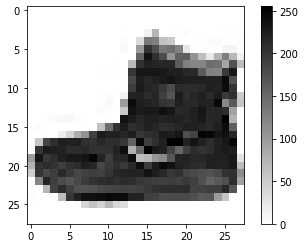

In [11]:
# Do not change anything in this code block (MEEM 5990 Project 5)

plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary) # Plotting the first (index = 0) training image, you can check other training images 
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
# Do not change anything in this code block (MEEM 5990 Project 5)

train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

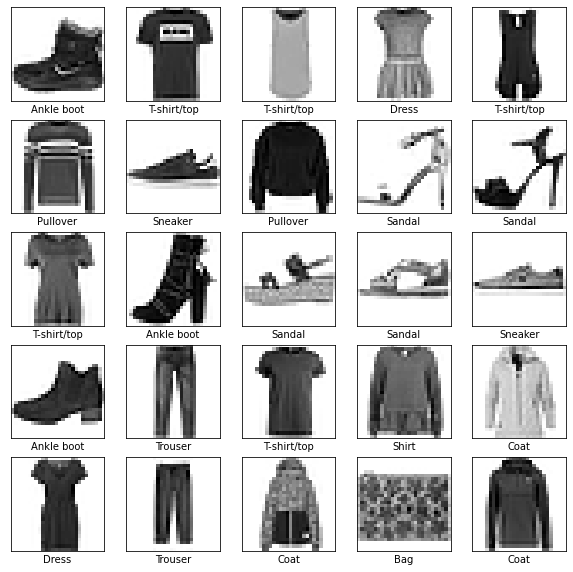

In [13]:
# Do not change anything in this code block (MEEM 5990 Project 5)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [14]:
# This block is the neural network architecture. 
# You can change the number of layers, type of the layer, filter size, and activation function for the layers.

# activation functions can be found at https://www.tensorflow.org/api_docs/python/tf/keras/activations
# Generally same activation function is used for all layers except for the last layer where we do not have a activation now

model = models.Sequential()
model.add(layers.Conv2D(48, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Do not change the input shape. Filter size is 3X3. You can change it. 
model.add(layers.MaxPooling2D((2, 2))) # Max pooling or average pooling can be used
model.add(layers.Conv2D(64, (2, 2), activation='relu')) # Filter size here is 2X2
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

Let's display the architecture of your model so far:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        12352     
                                                                 
 average_pooling2d (AverageP  (None, 6, 6, 64)         0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
Total params: 29,280
Trainable params: 29,280
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        12352     
                                                                 
 average_pooling2d (AverageP  (None, 6, 6, 64)         0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 flatten (Flatten)           (None, 1600)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [18]:
# You can change the loss function if you want
# Other loss functions are found at https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Now we train the model
start = time.time() # starting stopwatch
history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels)) # You can change the number of epochs
end = time.time() # ending stopwatch
print('Time required to train: Training time = '+ str(np.round(end - start,4)) + ' seconds')

Epoch 1/3
1875/1875 [==============================] - 82s 43ms/step - loss: 0.4922 - accuracy: 0.8168 - val_loss: 0.4020 - val_accuracy: 0.8532
Epoch 2/3
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3173 - accuracy: 0.8839 - val_loss: 0.3132 - val_accuracy: 0.8854
Epoch 3/3
1875/1875 [==============================] - 70s 38ms/step - loss: 0.2710 - accuracy: 0.9008 - val_loss: 0.2983 - val_accuracy: 0.8886
Time required to train: Training time = 264.423 seconds


As the model trains, the loss and accuracy metrics are displayed. 

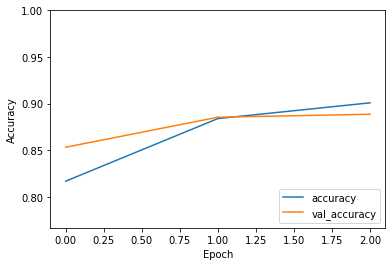

In [19]:
# Now we plot accuracy vs epoch. This plot needs to be retained for project report
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
yuplim1 = np.min(np.min(history.history['val_accuracy']))
yuplim2 = np.min(np.min(history.history['accuracy']))
plt.ylim([min(yuplim1,yuplim2)-0.05 , 1 ])
plt.legend(loc='lower right')


### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [20]:
# Do not change anything in this code block (MEEM 5990 Project 5)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) # You have to report his value in your project report

313/313 - 3s - loss: 0.2983 - accuracy: 0.8886 - 3s/epoch - 10ms/step

Test accuracy: 0.8885999917984009


### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [21]:
# Do not change anything in this code block (MEEM 5990 Project 5)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
# Do not change anything in this code block (MEEM 5990 Project 5)
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [23]:
# Do not change anything in this code block (MEEM 5990 Project 5)
predictions[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.004, 0.   ,
       0.995], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [24]:
# Do not change anything in this code block (MEEM 5990 Project 5)
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [25]:
# Do not change anything in this code block (MEEM 5990 Project 5)
test_labels[0]

9

### [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

tf.Tensor(
[[82.6  0.2  1.   2.8  0.9  0.1 11.9  0.   0.5  0. ]
 [ 0.  97.7  0.   1.2  0.7  0.   0.2  0.   0.2  0. ]
 [ 1.5  0.  70.3  1.  13.3  0.  13.8  0.   0.1  0. ]
 [ 1.1  1.2  0.5 88.8  6.   0.   2.4  0.   0.   0. ]
 [ 0.   0.   1.1  1.6 88.4  0.   8.9  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  97.   0.1  2.3  0.   0.6]
 [12.2  0.2  2.6  2.5  8.5  0.  73.6  0.   0.4  0. ]
 [ 0.   0.   0.   0.   0.   0.4  0.  97.8  0.   1.8]
 [ 0.2  0.1  0.2  0.6  1.   0.1  0.3  0.3 97.2  0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.1  4.2  0.  95.2]], shape=(10, 10), dtype=float64)


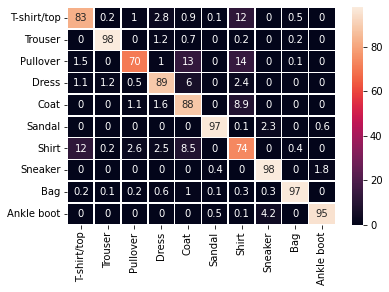

In [26]:
class_size = np.zeros((10,1))
for i in range(10):
  class_size[i] = np.sum(test_labels==i)

conf_mat = tf.math.confusion_matrix(test_labels,np.argmax(predictions,1))/class_size
print(conf_mat*100)

ax = sns.heatmap(conf_mat*100,annot=True, linewidth=0.5)
ax.set_xticklabels(class_names)
plt.xticks(rotation = 90)
ax.set_yticklabels(class_names)
plt.yticks(rotation = 0)
plt.show() # You have to retain this plot (confusion matrix)

Graph this to look at the full set of 10 class predictions.

In [27]:
# Do not change anything in this code block (MEEM 5990 Project 5)
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

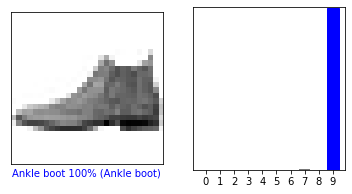

In [28]:
# Do not change anything in this code block (MEEM 5990 Project 5)
i = 0 # You can change the value of i if you want
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

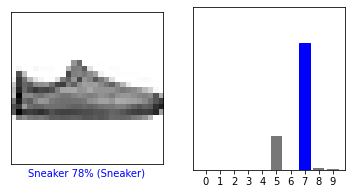

In [29]:
# Do not change anything in this code block (MEEM 5990 Project 5)
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

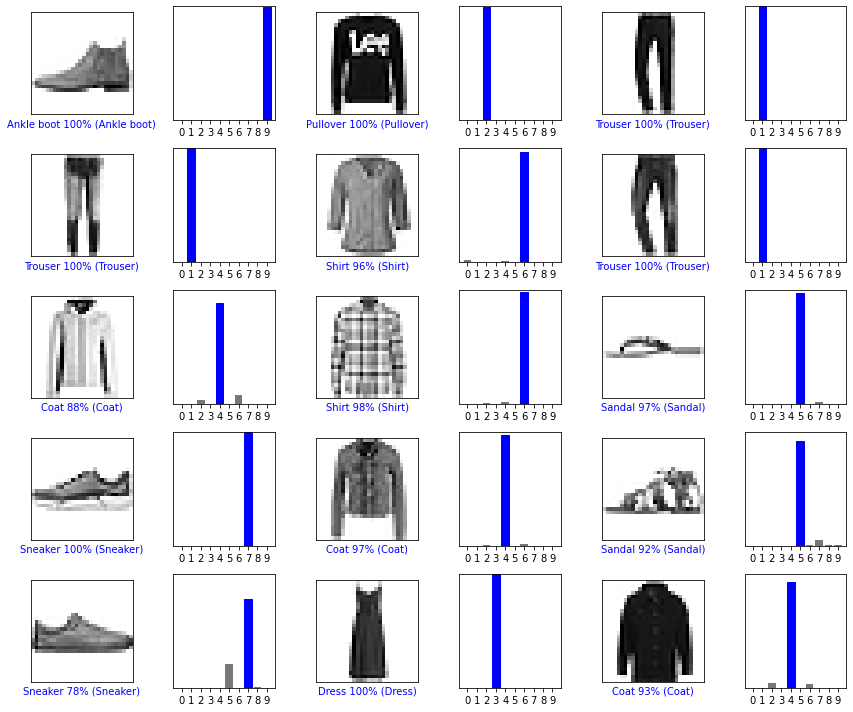

In [30]:
# Do not change anything in this code block (MEEM 5990 Project 5)
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

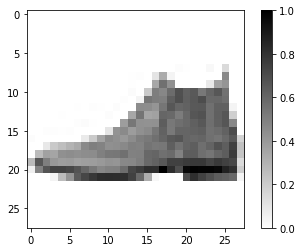

(28, 28)


In [31]:

# Plotting the first (index = 0) training image, you can check other training images 
img = test_images[0] 

plt.figure()
plt.imshow(img, cmap=plt.cm.binary) 
plt.colorbar()
plt.grid(False)
plt.show()

print(img.shape)

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [32]:
# Do not change anything in this code block (MEEM 5990 Project 5)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [33]:
# Do not change anything in this code block (MEEM 5990 Project 5)
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.    0.    0.    0.    0.    0.001 0.    0.004 0.    0.995]]


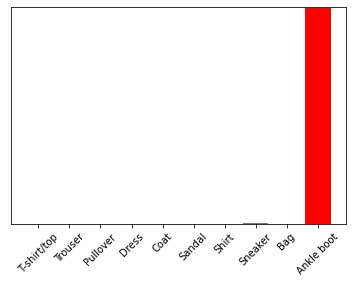

In [34]:
# Do not change anything in this code block (MEEM 5990 Project 5)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [35]:
# Do not change anything in this code block (MEEM 5990 Project 5)
class_names[np.argmax(predictions_single[0])]

'Ankle boot'

And the model predicts a label as expected.